# Importing Basic Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

# Importing the Dataset

In [2]:
assessment_1 = pd.read_csv("PredictiveModelingAssessmentData.csv")

In [3]:
assessment_1.head()

,y,x1,x2
0,1.300215,-0.054425,0.738897
1,-0.805025,0.130174,0.977855
2,2.801926,1.749007,1.352562
3,3.123490,-0.979458,1.664484
4,3.445728,0.300521,2.988848


# Basic Exploratory Analysis

In [4]:
assessment_1.shape

#There are 5000 rows and three columns

(5000, 3)

In [5]:
assessment_1.dtypes

#All variables are expressed as floats. It does not seem like any of them should be converted to categorical variables.

y     float64
x1    float64
x2    float64
dtype: object

In [6]:
assessment_1.isna().sum()

y     0
x1    0
x2    0
dtype: int64

There are no missing values in our data. (I know you said to assume no errors, but I just wanted to show a full analysis)

In [7]:
assessment_1.describe()

,y,x1,x2
count,5000.000000,5000.000000,5000.000000
mean,1.048158,-0.003752,1.503146
std,1.992383,1.008551,1.077676
min,-9.847133,-3.503908,0.015279
25%,-0.193654,-0.674079,0.733216
50%,1.002366,-0.002352,1.252496
75%,2.201069,0.664764,2.017572
max,10.274068,3.274246,8.126406


So it looks like X1 ranges from -3 to 3. X2 ranges from 0 to 8, and y ranges from -10 to 10. These ranges could be important to know for future modeling. 

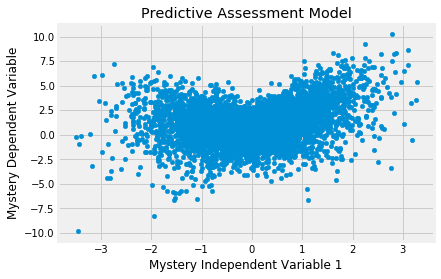

In [8]:
ax = assessment_1.plot(kind='scatter', x='x1', y='y')
plt.ylabel("Mystery Dependent Variable")
plt.xlabel("Mystery Independent Variable 1")
plt.title("Predictive Assessment Model");

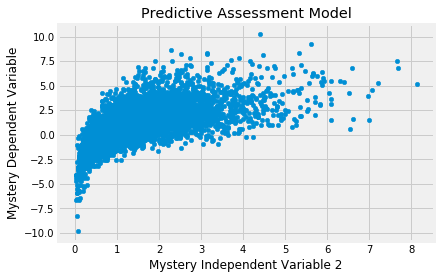

In [9]:
ax = assessment_1.plot(kind='scatter', x='x2', y='y')
plt.ylabel("Mystery Dependent Variable")
plt.xlabel("Mystery Independent Variable 2")
plt.title("Predictive Assessment Model");

I don't see too clear of a relationship between the X and y variables. Maybe a slightly positive relationship.

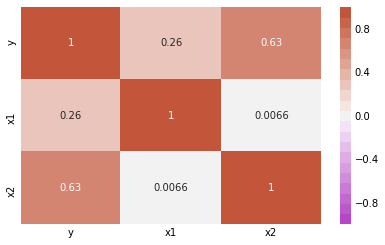

In [10]:
ax = sns.heatmap(assessment_1.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(300, 20, n=21))

Judging by the heatmap, X2 strongly correlates to y, X1 weakly correlates to y. The good news is that X1 and X2 are very weakly correlated with each other so we don't have to worry too much about collinearity.

# Basic Linear Regression

I believe starting off analysis of the data with standard linear regression makes the most sense because you can see the preliminary relationships easier. Then, you can build your model as a derivative of the standard model.

#### Separating X and Y Variables

In [11]:
X = assessment_1.iloc[:,1:3].values
y = assessment_1.iloc[:, 0].values

#### Creating a Training and Test Set

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

#I am setting aside 80% of the data for the training set and 20% for the test set. 

In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
#Scoring the model on the training set and test set.
#These are the R-squared values for the training set and test set. 

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.4691177216349711
0.4523910290639169


At first glance this model seems stable. The training set was able to capture 47% of the variance in the model and the test set was able to capture 45% of the variance. There is only a tiny discrepancy in the R-squared values between the training and test set so I am not too worried about high variance problems. The model might be suffering from underfitting though since it is not very predictive.

In [15]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_lr = sqrt(mean_squared_error(lr.predict(X_test), y_test))

print(rmse_lr)

1.465750990002121


#### Backward Elimination Version of Model Building

Before I build on the standard linear regression model, I want to double check the significance of our explanatory variables. If one or more of our explanatory variables is not statistically significant, then perhaps we can remove them from the model and our model could become more predictive.

I learned several ways to build models (Backward Elimination, Forward Selection, etc) and I am most comfortable with Backward Elimination.

In [16]:
#We need to add a column for the constant in the multiple linear equation
#Essentially we need a B0X0
#The stats model library is useful, but does not contain the constant column, hence why we add it

import statsmodels.formula.api as sm

#This is specifically a column of 5000 "ones" since the constant will just multiply by one to keep its value
#The append function helps us add a new column to our dataset
X = np.append(arr =  np.ones((5000,1)).astype(int), values = X, axis = 1)

In [17]:
print(X)

#As you can see we have a column of ones as intended

[[ 1.         -0.05442488  0.73889655]
 [ 1.          0.13017378  0.97785531]
 [ 1.          1.74900659  1.3525616 ]
 ...
 [ 1.         -0.06318463  0.30770302]
 [ 1.          0.35942927  0.21077722]
 [ 1.         -0.34570672  2.76505525]]


In [18]:
#We are going to create a separate set of X variables that are "high impact" based on our criteria
#First, we select a significance level needed to stay in the model. We will choose .05 to be simple
#Second, we fit the model with all possible predictors 
X_optimal = X[:,[0,1,2]]

regressor_OLS = sm.OLS(endog = y, exog = X_optimal).fit()

In [19]:
#Here we are checking the p-values of our various X variables

regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     2180.
Date:                Sat, 25 Jan 2020   Prob (F-statistic):               0.00
Time:                        20:23:53   Log-Likelihood:                -8972.8
No. Observations:                5000   AIC:                         1.795e+04
Df Residuals:                    4997   BIC:                         1.797e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7005      0.035    -19.816      0.000      -0.770      -0.631
x1             0.5112      0.020     25.028      0.000       0.471       0.551
x2             1.1646      0.019     60.931      0.000       1.127       1.202
==============================================================================
Omnibus:                       71.196   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.557
Skew:                          -0.070   Prob(JB):                     3.30e-28
Kurtosis:                       3.767   Cond. No.                         3.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Well, that was easy. All of the X-variables in our model are statistically significant. I will not remove any of them from the model.

#### Applying the Model to Test Data

Even though the standard linear regression model did not seem very predictive, I think it's important to derive the predicted values as a way of comparison to future models.

In [20]:
test_data = pd.read_csv("TestData.csv")

In [21]:
test_data.head()

,ID,x1,x2
0,1,-1.372412,0.641527
1,2,-1.264036,1.581535
2,3,-0.662299,0.302180
3,4,-0.344315,2.481366
4,5,0.463254,1.923973


Here I am filtering out the test data that we will use for our model

In [22]:
X_test2 = test_data.iloc[:,1:3].values

In [23]:
print(X_test2)

[[-1.3724117   0.64152749]
 [-1.26403638  1.58153531]
 [-0.66229865  0.30217961]
 ...
 [-2.70556215  5.28486016]
 [-1.48573566  0.90791403]
 [ 0.3123814   1.10833039]]


In [24]:
lr_pred = lr.predict(X_test2)

In [25]:
print(lr_pred)

[-0.67383431  0.47770753 -0.69230695 ...  4.02374793 -0.42386862
  0.76274627]


In [26]:
lr_pred.dtype

dtype('float64')

In [27]:
type(lr_pred)

numpy.ndarray

#### Adding Our Linear Regression Predictions to Our Dataset

In [28]:
linear_model = pd.concat([test_data, pd.DataFrame(lr_pred)], axis=1)

In [29]:
linear_model.head()

,ID,x1,x2,0
0,1,-1.372412,0.641527,-0.673834
1,2,-1.264036,1.581535,0.477708
2,3,-0.662299,0.302180,-0.692307
3,4,-0.344315,2.481366,2.012656
4,5,0.463254,1.923973,1.792071


In [30]:
linear_model = linear_model.rename({0: 'lr_pred'}, axis=1)

In [31]:
linear_model.head()

,ID,x1,x2,lr_pred
0,1,-1.372412,0.641527,-0.673834
1,2,-1.264036,1.581535,0.477708
2,3,-0.662299,0.302180,-0.692307
3,4,-0.344315,2.481366,2.012656
4,5,0.463254,1.923973,1.792071


# Log Transformation?

Before I move on to more advanced models, I just wanted to see if a logarithmic transformation of the data would make sense

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


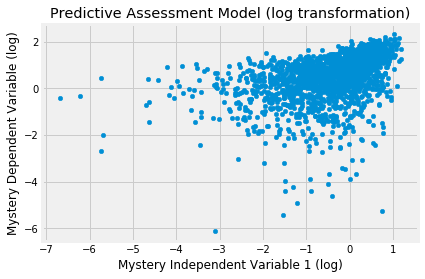

In [32]:
#Although it doesn't seem like a log transformation would work I tried it out anyway just in case.

log_assessment1 = np.log(assessment_1)
ax = log_assessment1.plot(kind='scatter', x='x1', y='y');
plt.ylabel("Mystery Dependent Variable (log)")
plt.xlabel("Mystery Independent Variable 1 (log)")
plt.title("Predictive Assessment Model (log transformation)");

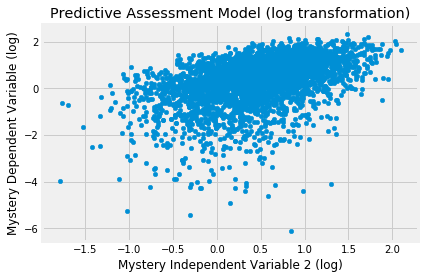

In [33]:
ax = log_assessment1.plot(kind='scatter', x='x2', y='y');
plt.ylabel("Mystery Dependent Variable (log)")
plt.xlabel("Mystery Independent Variable 2 (log)")
plt.title("Predictive Assessment Model (log transformation)");

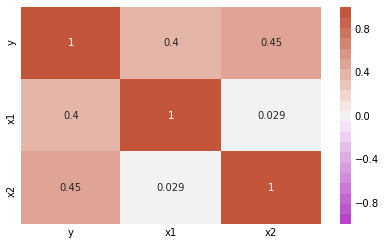

In [34]:
ax = sns.heatmap(log_assessment1.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(300, 20, n=21))

Overall I would say the log transformation of our data did not help in improving accuracy. X1 is correlated higher with y under a log transformation, but X2 has lost significant explanatory power and we don't want that.

# Random Forest Regression

The next kind of model we can build for prediction is a Random Forest Regression

#### Separating X and Y Variables

In [35]:
X2 = assessment_1.iloc[:,1:3].values
y2 = assessment_1.iloc[:, 0].values

#### Creating a Training and Test Set

In [36]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = .2, random_state=0)

In [37]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X2_train, y2_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [38]:
print(rfr.score(X2_train, y2_train))
print(rfr.score(X2_test, y2_test))

0.9592131215836533
0.6817685282591749


Well, compared to the simple linear regression model the Random Forest regression is more accurate in the sense that both the training and test set can explain a high degree of variance in the model. However, the Random Forest model is suffering from both overfitting and high variance due to the large discrepancy in R-squared values between the training and test sets. Nevertheless we will continue

In [39]:
rmse_rfr = sqrt(mean_squared_error(rfr.predict(X2_test), y2_test))

print(rmse_rfr)

1.1173686514880536


In [40]:
rfr_pred = rfr.predict(X_test2)

In [41]:
print(rfr_pred)

[-0.47968609  1.37610394 -1.71070713 ...  6.32329002 -0.36622773
  0.99749191]


In [42]:
rfr_model = pd.concat([linear_model, pd.DataFrame(rfr_pred)], axis=1)

In [43]:
rfr_model.head()

,ID,x1,x2,lr_pred,0
0,1,-1.372412,0.641527,-0.673834,-0.479686
1,2,-1.264036,1.581535,0.477708,1.376104
2,3,-0.662299,0.302180,-0.692307,-1.710707
3,4,-0.344315,2.481366,2.012656,0.734119
4,5,0.463254,1.923973,1.792071,1.694001


In [44]:
rfr_model = rfr_model.rename({0: 'rfr_pred'}, axis=1)

In [45]:
rfr_model.head()

,ID,x1,x2,lr_pred,rfr_pred
0,1,-1.372412,0.641527,-0.673834,-0.479686
1,2,-1.264036,1.581535,0.477708,1.376104
2,3,-0.662299,0.302180,-0.692307,-1.710707
3,4,-0.344315,2.481366,2.012656,0.734119
4,5,0.463254,1.923973,1.792071,1.694001


# XGBoost Regression

The final model I wanted to create for predictions is an XGBoost model

#### Separating X and Y Values

In [46]:
X3 = assessment_1.iloc[:,1:3].values
y3 = assessment_1.iloc[:, 0].values

#### Creating a Training and Test Set

In [47]:
from sklearn.model_selection import train_test_split

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = .2, random_state=0)

In [48]:
import xgboost as xgb
xgb_reg = xgb.XGBRegressor()

In [49]:
xgb_reg.fit(X3_train, y3_train)

[20:23:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [50]:
print(xgb_reg.score(X3_train, y3_train))
print(xgb_reg.score(X3_test, y3_test))

0.7708685576449601
0.7283981904970939


This looks like the best overall model I have built so far. There is a very low discrepancy between the training and test sets. Also, both R-squared values indicate greater than 70% of the variance can be explained. 

In [51]:
rmse_xgb = sqrt(mean_squared_error(rfr.predict(X3_test), y3_test))

print(rmse_xgb)

1.1173686514880536


In [52]:
xgb_pred = xgb_reg.predict(X_test2)

In [53]:
print(xgb_pred)

[-0.23003745  1.6047343  -1.5050387  ...  5.892529    0.40485352
  0.47726625]


In [54]:
xbg_model = pd.concat([rfr_model, pd.DataFrame(xgb_pred)], axis=1)

In [55]:
xbg_model.head()

,ID,x1,x2,lr_pred,rfr_pred,0
0,1,-1.372412,0.641527,-0.673834,-0.479686,-0.230037
1,2,-1.264036,1.581535,0.477708,1.376104,1.604734
2,3,-0.662299,0.302180,-0.692307,-1.710707,-1.505039
3,4,-0.344315,2.481366,2.012656,0.734119,1.655975
4,5,0.463254,1.923973,1.792071,1.694001,1.563035


In [56]:
xbg_model = xbg_model.rename({0: 'xgb_pred'}, axis=1)

In [57]:
xbg_model.head()

,ID,x1,x2,lr_pred,rfr_pred,xgb_pred
0,1,-1.372412,0.641527,-0.673834,-0.479686,-0.230037
1,2,-1.264036,1.581535,0.477708,1.376104,1.604734
2,3,-0.662299,0.302180,-0.692307,-1.710707,-1.505039
3,4,-0.344315,2.481366,2.012656,0.734119,1.655975
4,5,0.463254,1.923973,1.792071,1.694001,1.563035


In [58]:
xbg_model.to_csv("TestDataPredictions.csv")

# Final Thoughts

1. I cannot add more data to improve the model
2. I don't believe I can clean the data since there are aren't any null values and I am working with the assumption there are no errors
3. I did not see any outlier values that I would consider eliminating, at least without knowledge of what these variables actually stand for.